## Amazon Review Sentiment analysis 

In [83]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [84]:
df = pd.read_csv(r"D:\ALL Projects\1ML\Amazon_reviews_sentiment_analysis\amazon_reviews_sentiment.csv")
df.head(3)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1


In [85]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [86]:
### Dont need the date column 
df.drop(columns = ['date'], inplace = True)
df.head(2)

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1


# Visualize the data

<Axes: >

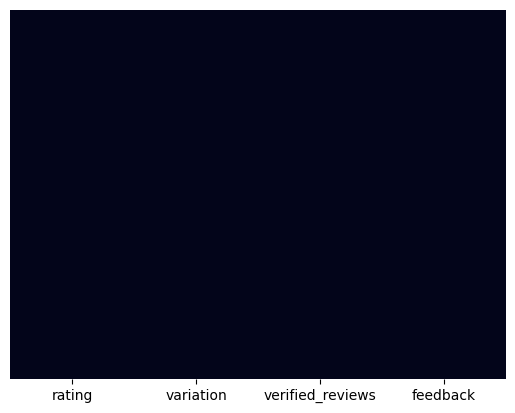

In [87]:
sns.heatmap(df.isnull(), cbar = False, yticklabels= False)  #  check for null values

<Axes: xlabel='rating', ylabel='count'>

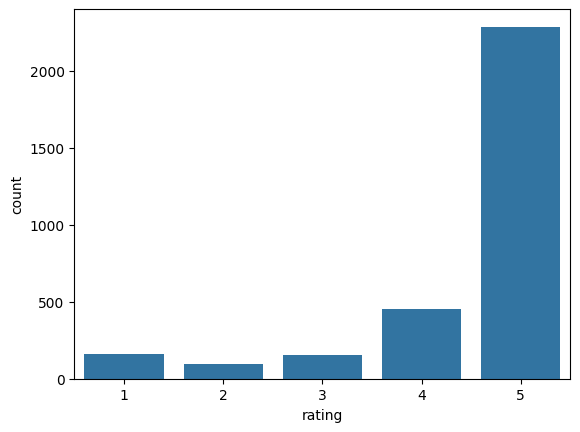

In [88]:
## Count plot for ratings 1-5
sns.countplot( x = 'rating', data = df)

<Axes: xlabel='feedback', ylabel='count'>

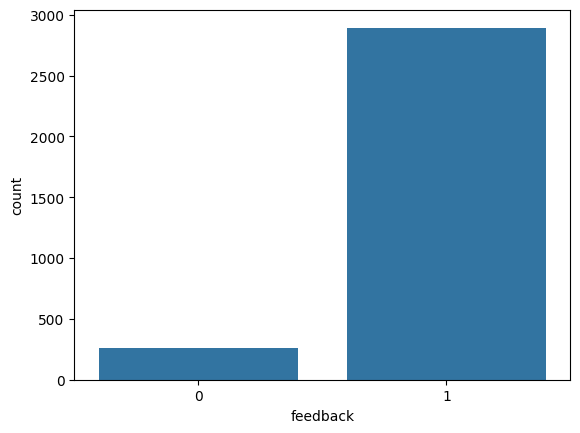

In [89]:
## Count plot for feedback 0 and 1
sns.countplot( x = 'feedback', data = df)

# Exploratory data analysis

In [90]:
df.isnull().sum()


rating              0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [91]:
## Check the original data shape
df.shape

(3150, 4)

In [92]:
## In varified_reviews column there are null values. drop those rows
df = df.dropna(subset=['verified_reviews'])
df.isnull().sum()

rating              0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [93]:
## Check shape after removing 1 row
df.shape

(3149, 4)

In [94]:
# Get length of the verified_reviews column & fill the null values with 0
df['length'] = df['verified_reviews'].fillna(0).apply(len)

df


,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


<Axes: ylabel='Frequency'>

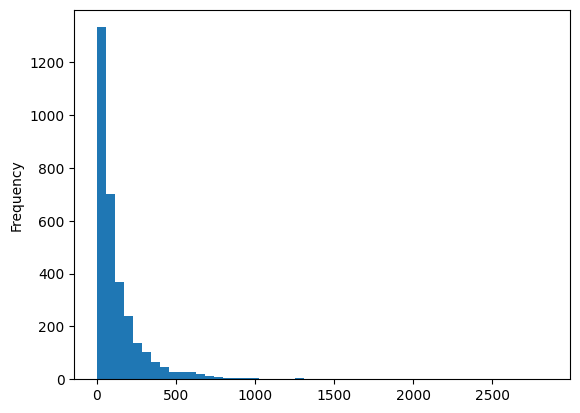

In [95]:
# Histogram of the length column
# df['length'].hist(bins=50)
df['length'].plot(bins=50, kind='hist')

In [96]:
df.describe()

,rating,feedback,length
count,3149.000000,3149.000000,3149.000000
mean,4.463957,0.918704,132.090187
std,1.067773,0.273332,182.114569
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [97]:
# Most ratings are 4–5 stars → customers are happy.

# About 9 out of 10 reviews are positive.

# Reviews are usually short, but there are some detailed long reviews.   longest length is 2851.000000

In [98]:
## Here is the longest review
df[df['length'] == 2851.000000]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [99]:
## Longest row with the review 
df[df['length'] == 2851]


,rating,variation,verified_reviews,feedback,length
2016,5,Black Plus,Incredible piece of technology.I have this rig...,1,2851


In [100]:
## Average length of the reviews 
df[df['length'] == 132]['verified_reviews'].iloc[0]


'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

In [101]:
df[df['length'] == 132]

,rating,variation,verified_reviews,feedback,length
570,4,Black,Nice. It works good.Some times is not easy to ...,1,132
1655,5,White Show,awesome product! I am in the process of having...,1,132
1705,3,Black Show,"If you belong to amazon prime, I would think t...",1,132
2321,4,Configuration: Fire TV Stick,I expected to have access to more current movi...,1,132
2483,4,White Dot,Works good for the most part. You ask it some ...,1,132
2834,4,White Dot,Works good for the most part. You ask it some ...,1,132


In [102]:
## Get the positive review only
positive_reviews = df[df['feedback'] == 1]
positive_reviews

,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


In [103]:
## Get the negative review only
negative_reviews = df[df['feedback'] == 0]
negative_reviews

,rating,variation,verified_reviews,feedback,length
46,2,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,Charcoal Fabric,Not much features.,0,18
162,1,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...
3047,1,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,Black Dot,The only negative we have on this product is t...,0,240
3091,1,Black Dot,I didn’t order it,0,17


positive reviews to list then in one string

In [104]:
## connvert positive reviews it to list (  makes it easy to pass reviews to NLP libraries )
sentences = positive_reviews['verified_reviews'].tolist()
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [105]:
## Make all reviews into a large string
pos_review_as_one_string = " ".join(sentences)
pos_review_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

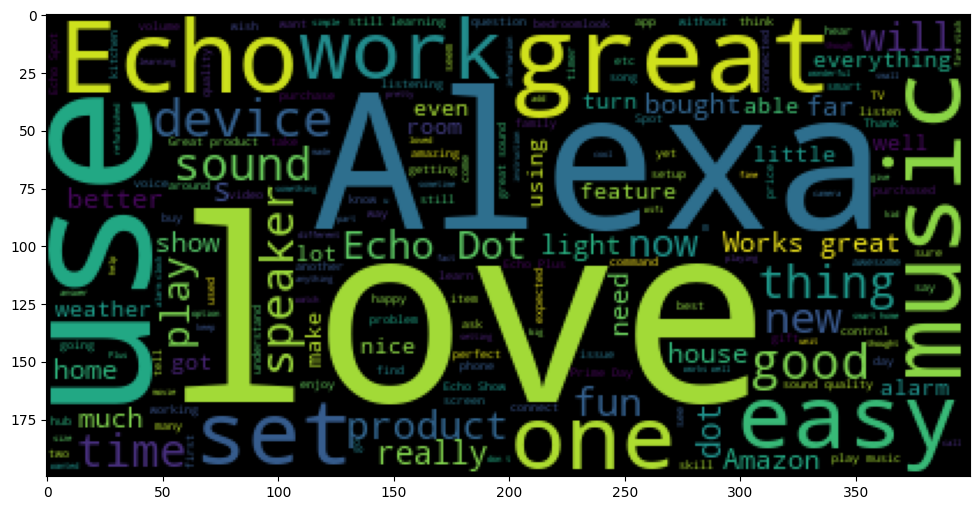

In [106]:
## PLay with wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(12,6))
plt.imshow(WordCloud().generate(pos_review_as_one_string))

Negative review to list then one string

In [107]:
## connvert positive reviews it to list (  makes it easy to pass reviews to NLP libraries )
sentences = negative_reviews['verified_reviews'].tolist()
sentences

["It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.",
 'Sound is terrible if u want good music too get a bose',
 'Not much features.',
 "Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",
 'Sad joke. Worthless.',
 'Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.',
 "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things",
 "I am not super impressed with Alexa. When my Prime lapsed, she wouldn't play anything. She isn't smart enough to differentiate among spotify accounts so we can't use it f

In [108]:
## Make all reviews into a large string
neg_review_as_one_string = " ".join(sentences)
neg_review_as_one_string

'It\'s like Siri, in fact, Siri answers more accurately then Alexa.  I don\'t see a real need for it in my household, though it was a good bargain on prime day deals. Sound is terrible if u want good music too get a bose Not much features. Stopped working after 2 weeks ,didn\'t follow commands!? Really fun when it was working? Sad joke. Worthless. Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa. It\'s got great sound and bass but it doesn\'t work all of the time. Its still hot or miss when it recognizes things I am not super impressed with Alexa. When my Prime lapsed, she wouldn\'t play anything. She isn\'t smart enough to differentiate among spotify accounts so we can\'t use it for that either. She r

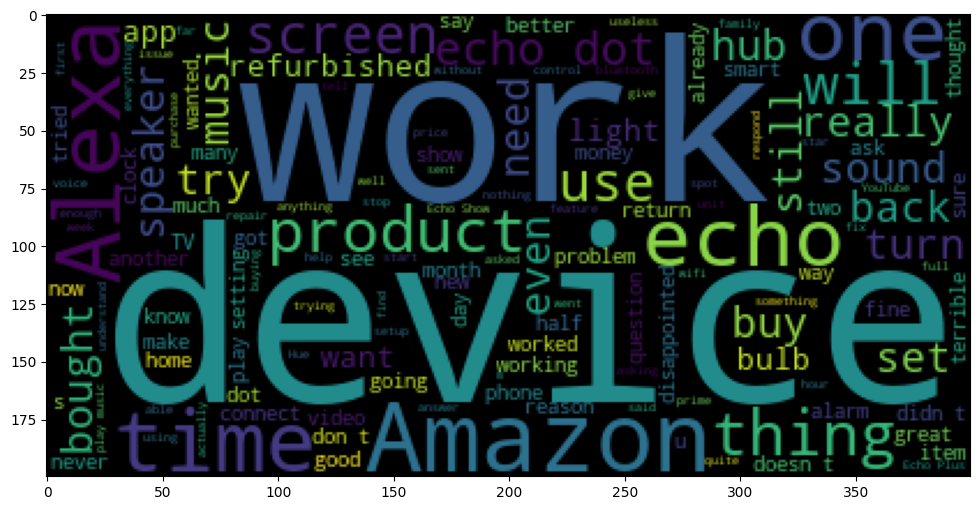

In [109]:
## PLay with wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(12,6))
plt.imshow(WordCloud().generate(neg_review_as_one_string))

# Data processing

In [110]:
import string
string.punctuation  #  to clean the string drom punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [111]:
import nltk

In [112]:
# Remove common words that don’t carry much meaning. 
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAIMON\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [113]:
# 1.. remove punctuation ---  2.. remove stopwords

def clean_review(review):
    # 1.. remove punctuation
    temp_punc_removed = [char for char in review if char not in string.punctuation]
    # add all into a single string
    punc_removed_join = ''.join(temp_punc_removed)
    
    # 2... stopwords removal but first convert them into lowercase
    punc_removed_join_stopped = [word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return punc_removed_join_stopped

In [114]:
df_clean = df['verified_reviews'].apply(clean_review)

In [115]:
# original review
print(df['verified_reviews'].iloc[0:5])

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object


In [116]:
# cleaned review
print(df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [117]:
## vectorization  ( convert text into numerical representation )
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=clean_review)
reviews_countvector = vectorizer.fit_transform(df['verified_reviews'])

In [119]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [120]:
print(reviews_countvector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [121]:
reviews_countvector.shape

(3149, 5211)

In [122]:
reviews = pd.DataFrame(reviews_countvector.toarray())

In [123]:
x = reviews
x

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
y = df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3149, dtype: int64

In [125]:
x.shape, y.shape

((3149, 5211), (3149,))

# using naive bayes classifier

In [126]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [127]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<Axes: >

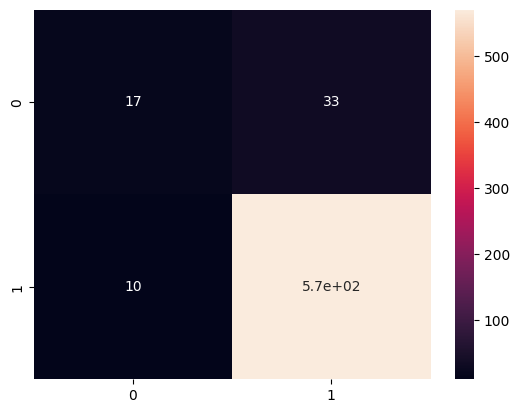

In [129]:
## predict on test data
y_pred = nb.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.34      0.44        50
           1       0.95      0.98      0.96       580

    accuracy                           0.93       630
   macro avg       0.79      0.66      0.70       630
weighted avg       0.92      0.93      0.92       630



Class 0
precision=0.63, recall=0.34, f1-score=0.44, support=50


Only 50 samples belong to class 0.

Precision = 0.63 → 63% of predictions labeled 0 were correct.

Recall = 0.34 → Only 34% of actual class 0 were correctly predicted.

F1-score = 0.44 → Balance of precision and recall is low.

✅ Interpretation: Model struggles with class 0 (probably minority class).

----------------------------------------------------------------------------
Class 1
precision=0.95, recall=0.98, f1-score=0.96, support=580


580 samples belong to class 1 (majority class).

Precision = 0.95 → 95% of predicted class 1 were correct.

Recall = 0.98 → 98% of actual class 1 were correctly predicted.

F1-score = 0.96 → Excellent performance on class 1.

✅ Interpretation: Model performs very well on the majority class.

-----------------------------------------------------------------------------
Overall Metrics

Accuracy = 0.93 → 93% of total predictions were correct.

Macro avg (unweighted average across classes):

Precision = 0.79, Recall = 0.66, F1 = 0.70

Shows model struggles with class imbalance (class 0 performance is low).

Weighted avg (weighted by support):

Precision = 0.92, Recall = 0.93, F1 = 0.92

Takes class imbalance into account — dominated by majority class 1.



# try with logistic regression classifier

              precision    recall  f1-score   support

           0       0.88      0.30      0.45        50
           1       0.94      1.00      0.97       580

    accuracy                           0.94       630
   macro avg       0.91      0.65      0.71       630
weighted avg       0.94      0.94      0.93       630



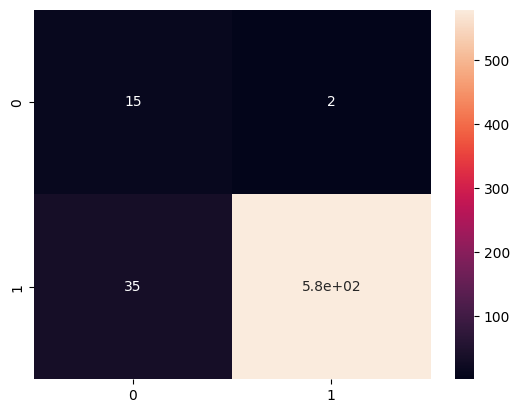

In [132]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

Step 1: Class 0 (minority class, 50 samples)
Metric	Value	Ideal	Interpretation
Precision	0.88	1.0	88% of predictions labeled 0 were correct → pretty good
Recall	0.30	1.0	Only 30% of actual class 0 were detected → model misses most class 0 samples
F1-score	0.45	1.0	Low because recall is very low
Support	50	—	Small number of samples → class imbalance

Insight: Model struggles to detect minority class 0, even though predictions for it are mostly correct (high precision).

Step 2: Class 1 (majority class, 580 samples)
Metric	Value	Ideal	Interpretation
Precision	0.94	1.0	Most predictions for class 1 are correct
Recall	1.00	1.0	Model captures all actual class 1 instances perfectly
F1-score	0.97	1.0	Excellent balance between precision and recall
Support	580	—	Majority class dominates the dataset

Insight: Model predicts majority class almost perfectly.

Step 3: Overall Metrics
Metric	Value	Ideal	Interpretation
Accuracy	0.94	1.0	94% correct overall → looks high, but dominated by class 1
Macro avg	precision 0.91, recall 0.65, F1 0.71	1.0	Average across classes ignores imbalance → recall is low because of class 0
Weighted avg	precision 0.94, recall 0.94, F1 0.93	1.0	Weighted by support → dominated by majority class → seems high
Step 4: Key Takeaways

High accuracy (0.94) is misleading — the model mainly predicts the majority class 1 correctly.

Class 0 recall is very low (0.30) → model fails to capture minority class.

Precision for class 0 is decent (0.88) → when it predicts 0, it’s usually correct.

Macro average shows real imbalance effects (recall 0.65).